Студент Жилкин Федор, 344
# Домашняя работа 6: "Формулы Гаусса."
**Задания:**

Требуется вычислить 
 
$\int\limits_0^1 \frac {cos(2x)}{\sqrt[3]{x}}dx$

следующими способами:
1. По формуле Гаусса с двумя узлами
2. Построить формулу типа Гаусса с двумя узлами и вычислить итеграл по этой формуле

In [106]:
import numpy as np
import pylab as plt
from sympy import *
import pandas as pd

In [107]:
def F(x):
    return np.cos(2*x)/(x**(1/3))

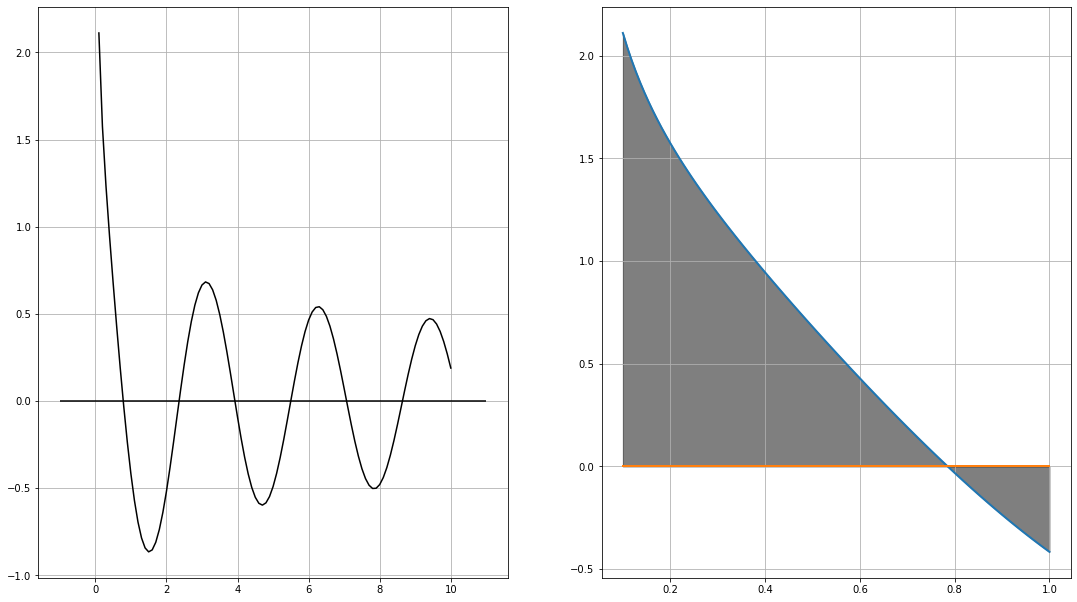

In [111]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

a = fig.add_subplot(1, 2, 1)
x = np.linspace(0.1, 10, 100)
y = np.cos(2*x)/(x**(1/3))
a.plot(x, y, color='black')
a.hlines(0, -1, 11, color='black')
a.grid(True)

a = fig.add_subplot(1, 2, 2)
x  = np.linspace(0.1, 1, 100)
y1 = np.cos(2*x)/(x**(1/3))
y2 = x*0
plt.plot(x,y1,lw=2)
plt.plot(x,y2,lw=2)
plt.fill_between(x, y1,y2,color='k',alpha=.5)
a.grid(True)

**Точное значение: 0.8802**

## Формула Гаусса с двумя узлами

In [116]:
def Gauss_2(roof=1, floor=0):
    return (roof-floor)/2*(F((floor+roof)/2 - (roof-floor)/(2*3**(1/2))) + F((floor+roof)/2 + (roof-floor)/(2*3**(1/2))))

In [117]:
Gauss_2()

0.7620212901355196

**Погрешность: 0.1181**

## Формула типа Гаусса с двумя узлами

In [118]:
def Gauss_interpol():    
    x = Symbol('x')
    p = 1/x**(1/3)
    m0 = float(integrate(p, (x,0,1)))
    m1 = float(integrate(x*p, (x,0,1)))
    m2 = float(integrate(x**2*p, (x,0,1)))
    m3 = float(integrate(x**3*p, (x,0,1)))
    A = [[m1, m0],[m2, m1]]
    b = [-m2, -m3]
    z = np.linalg.solve(A, b)
    a1 = z[0]
    a2 = z[1]
    x1 = (-a1 + np.sqrt(a1**2-4*a2))/2 
    x2 = (-a1 - np.sqrt(a1**2-4*a2))/2 
    A1 = (m1 - x2*m0)/(x1 - x2)
    A2 = (m1 - x1*m0)/(x2 - x1)
    return A1*F(x1) + A2*F(x2)

In [119]:
Gauss_interpol()

1.6264189651154175

**Погрешность: 0.7462**